# Machine Learning (ML)


* traditional: (mostly) supervised learning with manual feature selection
* current trend: deep learning (neural nets) often with automatic feature selection

We have a look at traditional supervised approaches, only.

## Basic Notions 

overall goal: learning of a function such that given a (new) object, its class can be predicted reliably

example: given an email, predict whether it is Spam or not


### supervised - unsuperivsed

* supervised: training examples
 * annotated data needed
 * e.g. text classification (e.g. Spam vs. NonSpam)
* unsupervised: no training
 * e.g. clustering (group objects into classes)
 * e.g. matrix factorization (LDA, LSA, NMF)
 
### features

A feature is some perceivable or otherwise associated (contextual, derivable) part of an object that has some predictive power. An ideal feature would perfectly correlate with the class prediction. 

example: Spam/NonSpam

* we'd use the tokens (words, emojis etc.) as features
* we have a large number of emails available where each email is classified as Spam or NonSpam

Features:

* words (lemmata)
* word embeddings
* all linguistic properties might be used as features (PoS tags, grammatical functions, ...)
* frequency counts or some metrics like tf-idf
* other surface properties like distance between two objects (coreference resolution)
* information from available resources (thesauri, wordNet, etc.) 

We represent a single object by its features. We use a *feature vector* to do so!

If we have good feature, we can hope to learn a good classifier.


## Classification versus regression

classification example (non linguistic): type of dwellings in Zurich

classes (e.g.): luxury resort, family resort, student resort

* number of rooms
* region (Quartier)
* ..

they all together somehow determine the class

regression example (non linguistic): prize of dwellings in Zurich

we use the some features, but predict a regression line


## Ideal features:

example setting: we are sitting in a room and we hear (outside the door) or smell

* some barking: there is a dog
* a siren: there is an ambulance car
* smoke: there is fire
* ...

These are almost perfect featues. In ML we don't have ideal features!

The word "bitcoin" in an email is (at least in my world) a perfect indicator of Spam. But most of the time, a feature more or less correlates with the class. It is the task of the ML approach to weigh a feature, ie. to determine the importance of a feature.

A serious reason why we won't have ideal features:

* our data often is noisy
* we don't have the resources to find ideal features
* there are no ideal features

### noisy data

A data set is noisy, if some objects do carry the wrong class label.

example: an email annotated as Spam is nonSpam
example: a PoS tag is wrong

### missing resources

Assume a language for which we don't have a parser. In order to determine the syntactic complexity of a text, we thus have to rely on secondary features, say sentence length.

### no ideal features exist

From the perspective of an investor:

* what is a good indicator of the success of a ew start up company?
 * the business plan, the academic grade of the members, the subject area, the city they're located in, ....

We have to deal with noise and mediocre features. We need robust approaches!

### features types

* numerical: frequency counts, tf-idf
* categorical/nomial: PoS tags, lemmata

Some ML approaches expect numerical features. Thus, we often have to map categorical features to numeric representations.


## Linear separability of objects

If we describe objects by n (numerical) properties as vectors, then they represent points in n-dimensional Euclidean space. Ideally, all objects of one class are grouped in one region (SPAM) and the others in another (NOSPAM). 
Reason: examples of each class are similar.
Learning is then the finding of a dividing line (2-dimensional) or (in general) hyperplane. 

If objects behave in this way, then they are *linearly separable* and can be described with a *linear classifier*.

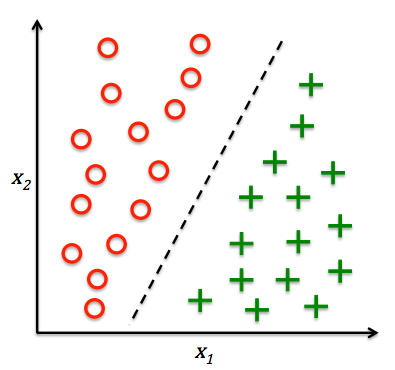

The general shape of such a hyperplane is: $f(x) = \sum_i w_i*x_i + b$

If you set $x_0=1$ you can absorb $b$ and get $f(x) = \sum_i w_i*x_i$ (the dot product)

If, instead of separating objects, you look for the best approximation of them, you do not classification but *regression*:

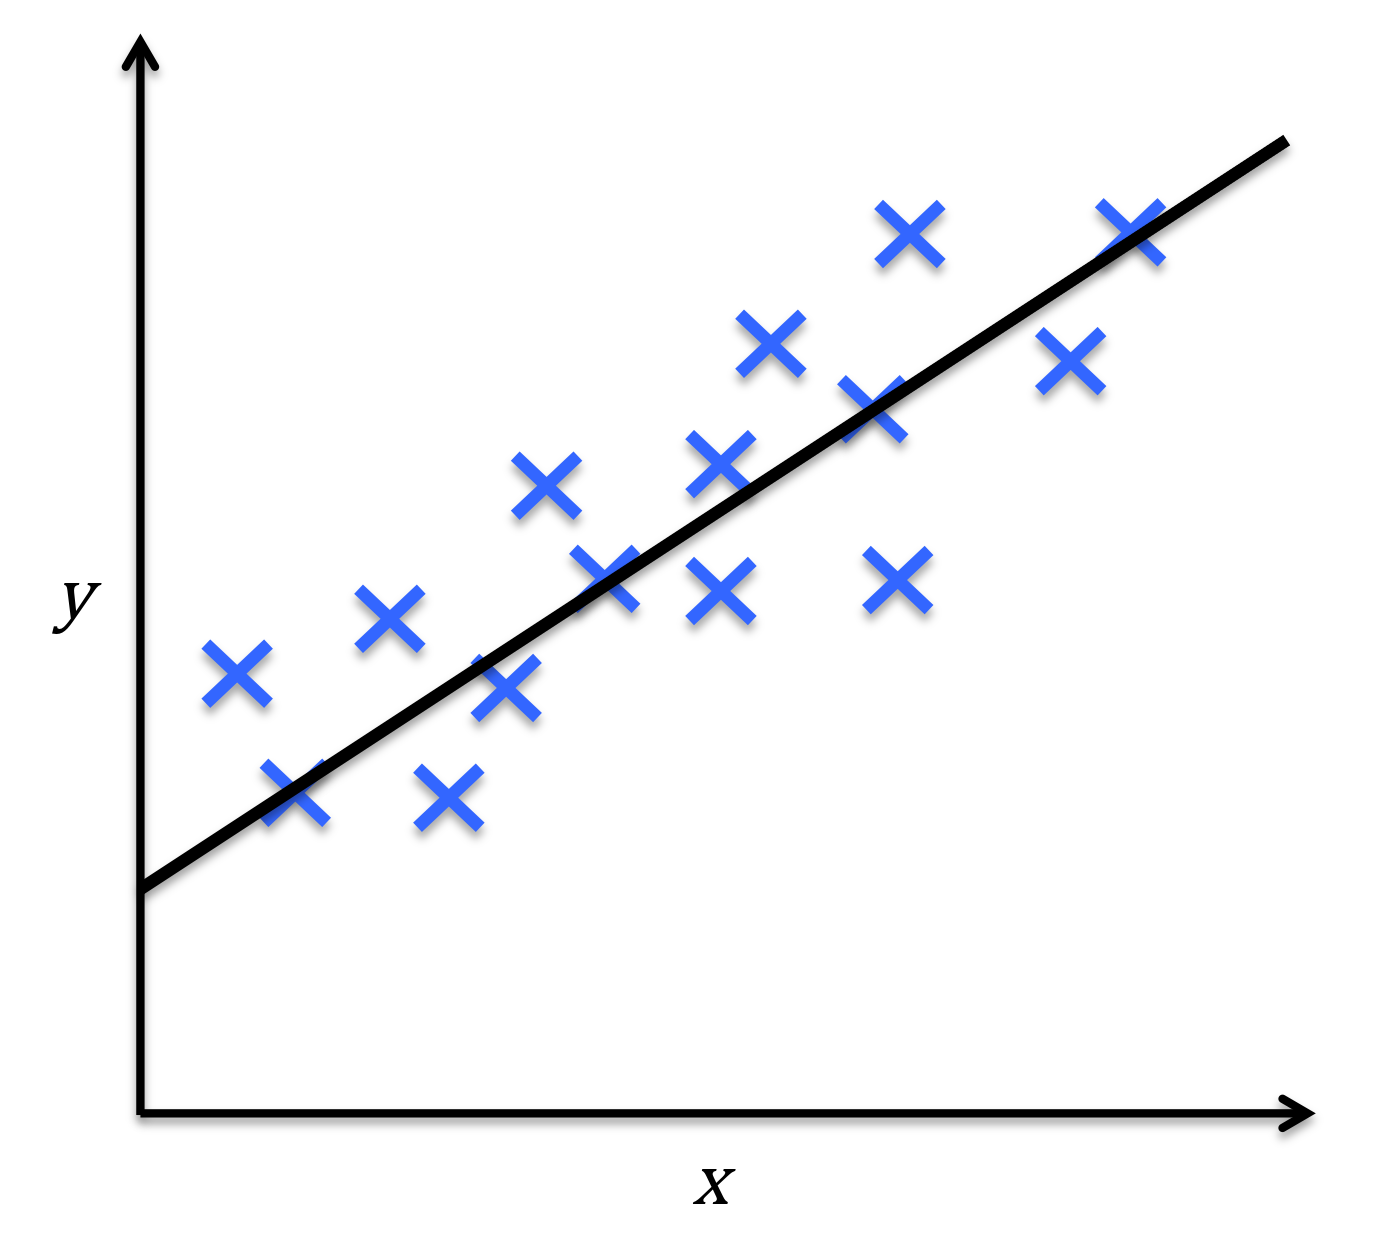

e.g. forecasting the prices of dwellings on the basis of their attributes (location, size, etc.)

## Non-linear separabilty of objects

We'd need a non-linear classifier to cope with these cases. In this case, we have 3 classes, but we can't seperate it by 2 lines.

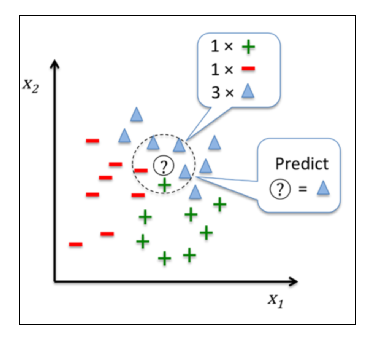


# Example SPAM vs. NON-SPAM
 
Our objects are email, features are for instance (but we keep it simple)

* binary: sender is known (might be a NON-SPAM Indicator)
* binary: the subject text is long
* binary: the text body contains pharmaceutical words (SPAM indicator)
* binary: the text mentions prices 

non-binary: if we count how many pharmaceutical words are in the email


## Example of a (real) SPAM email

From: RAY-BAN <lucy@shanhe365.com>

Subject: Plunge into the coolest prices end of this summer!

Our promises:

- Free delivery and returns with no minimum spend
- 100 days to return or exchange an item
- Same-day dispatch for orders placed before 7 Days.*
- Complete security with 100% secure order processing
- Customer satisfaction is our top priority

*Twenty-four hours a day, dependent upon payment validation
*See terms and conditions

The represention by a feature vector: 

* 0 (we don't know the sender) 
* 1 (a long subject line) 
* 0 (no pharamceutic vocabulary)
* 1 (prices are mentioned)

thus we have: [0,1,0,1] with class =SPAM


### some made-up examples

ordered from left to right: sender, subject length, vocabulary, prize 

* [0,1,1,1] SPAM
* [0,1,1,0] NOSPAM
* [0,1,0,1] SPAM
* [1,0,0,1] NOSPAM
* [1,1,0,1] SPAM

We could learn a classifer to predict the class of a new example:  [1,0,1,1] 


### characteristics of this example

* preprocessing simple: we just take the tokens
* no normalization
* no NLP tools (parsing, etc.)
* only binary features
* in a real setting, we would use more features and more training examples

# Linear equations

'linear' here means that every variable of the equation is set to the first power.

$f(x) = y = b + w*x~~~~$  or $~~~~f(x) = y = w*x + b$ 

with $b$ = y axis offset and $w$ = slope (Steigung).

* example: $~~~~~~~~y= -0.5x + 1.5$


* rearranged: $~~~~y  + 0.5x - 1.5 = 0$

other variable names: $x_1$ instead of $x$ and $x_2$ instead of  $y$

* $x_2  + 0.5x_1 - 1.5 = 0$ 


* $0.5x_1 +x_2 - 1.5 = 0$

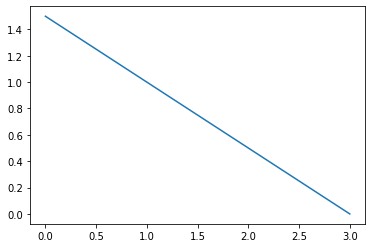

In [2]:
import matplotlib.pyplot as plt

def g(x1,x2):
    return x2 + 0.5*x1 - 1.5

plt.plot([0,3],[1.5,0])
plt.show()

* each point on the curve satisfies the equation: $0.5x_1 +x_2 - 1.5 = 0$

 * $x_1=3, x_2=0$ 
  *  0.5*3  + 0 - 1.5 = 0$
 
 * $x_1=0.5, x_2=2$ also
 
 Points above the function get a value > 0, point below get < 0.
 
 * $\langle x_1=0.5, x_2=1 \rangle$: 0.5*0.5 + 1  - 1.5 = -0.25

In [15]:
g(2,2), g(1,0.4), g(2,0.5)

(1.5, -0.6, 0.0)

claim: we can use this for classification

* if a vector gives a value > 0 than it belongs to the class above the line
* otherwise it's the class below

this is a perfect classifier, our classifier is just some f(x)


## Notational variants

$w_1x_1 + w_2x_2-b$ bzw. $0.5x_1 +x_2 - 1.5 = 0$


notation as dot product: $\vec{w} \cdot \vec{x} - b$
 
 * $\vec{w}$ = $\langle 0.5, 1 \rangle$ and $\vec{x}= \langle x_1, x_2 \rangle$  are vectors with $w_1=0.5$ etc.
 
 
 * $\vec{w}$ is the weight vector, $\vec{x}$ is the feature vector
 
##  dot product

$\vec{w} \cdot \vec{x} =-b + \sum_{i} \vec{w}_i * \vec{x}_i~~~~$ i.e. the sum of the multiplied dimensions of the vectors

$\vec{w} \cdot \vec{x} =-b + \sum_{i} \vec{w}_i * \vec{x}_i = -b + w_1*x_1 + w_2*x_2 $


$\vec{w} \cdot \vec{x} =-b + \sum_{i} \vec{w}_i * \vec{x}_i = -b + w_1*x_1 + w_2*x_2 = -1.5+ 0.5*x_1 + 1*x_2$



$\vec{w} \cdot \vec{x} =-b + \sum_{i} \vec{w}_i * \vec{x}_i = -b + w_1*x_1 + w_2*x_2 = -1.5+ 0.5*x_1 + 1*x_2=0.5*x_1 + 1*x_2 - b$


In [10]:
import numpy as np

w = np.array([0.5,1])
x = np.array([3,0])    # $x1=3, x2=0$

np.dot(w,x) - 1.5

0.0



If we set a weight $w_0=1$ for $b$, we can further (notationally) simplify: $\vec{w} \cdot \vec{x} = $0 with 

$w_0=1, w_1=0.5, w_2 = 1~~~~~$
$x_0=-1.5, x_1=0, x_2=3$

$\vec{w}=\langle 1,0.5,1 \rangle~~~~~~~~~~~~~~~~~~~~~~~~$
$\vec{x}=\langle -1.5,0.5,3 \rangle$



In [11]:
w = np.array([1,0.5,1])
x = np.array([-1.5,3,0])

np.dot(w,x) 

0.0

In [5]:
# back to our old setting with explicit b

w = np.array([0.5,1])
x = np.array([3,0])

### another notation variant 

Round brackets are used to denote (column and row) vectors. Mostly we assume that vectors are column vectors, so we have to transpose, i.e. $w^T$ (now we don't use arrows anymore).

transponation: we swap columns and rows

the weight vector looks like this (as default column vector):


* $w= \left( \begin{array}{c} 0.5 \\ 1 \end{array} \right)  $
* $w^T$ = transponation , i.e.   $\left( \begin{array}{c} 0.5 \\ 1 \end{array} \right)$  becomes  $( 0.5, 1 )$ 
* i.e. the second entry of the first column givest the second entry of the first row


* $\left( \begin{array}{cc} 0.5 & 1 \end{array} \right)$ $\left( \begin{array}{c} x_1 \\ x_2 \end{array} \right) - 1.5 $



* matrix multiplication: column times row (multipication in the sense of dot product)


In [13]:
np.matmul(w,x) - 1.5

-1.5

bzw. mit $w_0$

In [14]:
w = np.array([1,0.5,1])
x = np.array([-1.5,3,0])
np.matmul(w,x)

0.0

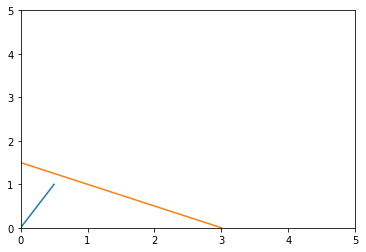

In [8]:
plt.plot([0,0.5],[0,1])   
plt.xlim(0, 5) 
plt.ylim(0, 5) 
plt.plot([0,3],[1.5,0])

plt.show()

* weight vector is blue 

The weight vector of a function is orthogonal to the curve of the function

## Multiplication of a scalar with a vector

$a * \vec{w}$ is just streched

In [9]:
w,4*w

(array([1. , 0.5, 1. ]), array([4., 2., 4.]))

# Conclusion and outlook:

Learing a linear classifier just means to induce (find) a linear curve separating the classes (binary case)

So now you should understand that $w \cdot x$ might represent a linear classifier!